In [1]:
import pandas as pd
import numpy as np
from ua_parser import user_agent_parser
import matplotlib.pyplot as plt
import tkinter
from reportlab.pdfgen import canvas

In [2]:
def data_head(data):
    print(data.head)

In [3]:
def refine_data(data):
    data.drop(['Column2','Column3'],axis=1,inplace = True)
    data['Column2'] = data['Column4']+data['Column5']
    data.drop(['Column4','Column5'],axis=1,inplace = True)
    sample_data = {'Col6': data['Column6']}
    df = pd.DataFrame(sample_data)
    split_columns = df['Col6'].str.split(expand=True)
    df[['HTTP_Method', 'Requested_URL', 'HTTP_Version']] = split_columns
    df.drop(columns=['Col6'], inplace=True)
    data.rename(columns = {'Column1':'IP','Column2':'DateTime','Column7':'StatusCode','Column8':'BytesSent',
                       'Column9':'Referrer','Column10':'UserAgent'},inplace=True)
    data['HTTP_Method'] = df['HTTP_Method']
    data['URL'] = df['Requested_URL']
    data['HTTP_Version'] = df['HTTP_Version']
    data.drop('Column6',axis=1,inplace=True)  

In [4]:
def ip_analysis(data):
    ip_count = data['IP'].value_counts().head(10)
    print("Top 10 unique ip addresses : ",ip_count)
    print("Bar graph between number of requests for top 10 ip")
    plt.figure(figsize = (14,8))
    ip_count.plot(kind = 'bar')
    plt.title('Number of Requests from each IP')
    plt.xlabel('IP Address')
    plt.ylabel('Number of Requests')
    plt.show()

In [5]:
def date_time(data):
    data['DateTime'] = data['DateTime'].str.strip('[]')
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d/%b/%Y:%H:%M:%S%z')

In [6]:
def url_analysis(data):
    print("URL hits in descending order")
    print(data['URL'].value_counts())
    print("Maximum hits to url are : ",data['URL'].value_counts().head(1))
    
    date_time(data)
    print('Calculate top 10 URL hits for each hour ')
    dt_group = data[['DateTime','Referrer','URL']].groupby([data['DateTime'].dt.hour])
    URL_count = dt_group['URL'].value_counts() 
    URL_count.groupby(['DateTime']).head(10)

In [7]:
def extract_browser_platform(user_agent_str):
    if isinstance(user_agent_str, str):
        parsed_ua = user_agent_parser.Parse(user_agent_str)
        return parsed_ua['user_agent']['family'], parsed_ua['os']['family']
    else:
        return None, None

In [8]:
def browser_platform(data):
   data[['Browser', 'Platform']] = data['UserAgent'].apply(extract_browser_platform).apply(pd.Series)
    

In [9]:
def platform(data):
    p_count = data['Platform'].value_counts()
    print("Hits per platform:\n" + str(p_count))

In [10]:
def graph_platform(data):
    print('Line graph between number of hits for each platform')
    plt.figure(figsize = (8,10))
    p_count.plot(kind = 'bar')
    plt.title('Number of hits for each platform')
    plt.xlabel('Platform')
    plt.ylabel('Number of hits')
    plt.show()

In [11]:
def browser(data):
    b_count = data['Browser'].value_counts()
    print('Hits per browser: ',b_count)
    
    print('Line graph between number of hits for each platform')
    plt.figure(figsize = (8,8))
    b_count.head(10).plot(kind = 'bar')
    plt.title('Number of hits for each browser')
    plt.xlabel('Browser')
    plt.ylabel('Number of hits')
    plt.show()
    

In [12]:
def http_codes(data):
    count1 = 0
    for i in data['Referrer']:
        if isinstance(i, str) and 'https' in i:
            count1 += 1

    print("Number of http codes are:", count1)

In [13]:
def Automation(data):
    data_head(data)
    refine_data(data)
    data_head(data)
    ip_analysis(data)
    url_analysis(data)
    extract_browser_platform(data)
    browser_platform(data)
    platform(data)
    browser(data)
    http_codes(data)


In [14]:
data = pd.read_csv(r"logdata.csv")
#Automation(data)

<bound method NDFrame.head of                Column1 Column2 Column3                Column4 Column5  \
0        87.116.74.253       -       -  [28/Feb/2022:14:04:44  +0200]   
1       91.196.124.220       -       -  [28/Feb/2022:14:04:47  +0200]   
2       91.196.124.220       -       -  [28/Feb/2022:14:06:45  +0200]   
3        87.116.74.253       -       -  [28/Feb/2022:14:06:44  +0200]   
4         66.249.70.57       -       -  [28/Feb/2022:14:06:46  +0200]   
...                ...     ...     ...                    ...     ...   
99996   82.137.115.107       -       -  [01/Mar/2022:20:43:01  +0200]   
99997    178.16.130.46       -       -  [01/Mar/2022:20:43:07  +0200]   
99998     77.85.210.87       -       -  [01/Mar/2022:20:43:11  +0200]   
99999    212.39.89.161       -       -  [01/Mar/2022:20:43:18  +0200]   
100000   212.39.89.161       -       -  [01/Mar/2022:20:43:24  +0200]   

                                                  Column6  Column7 Column8  \
0              

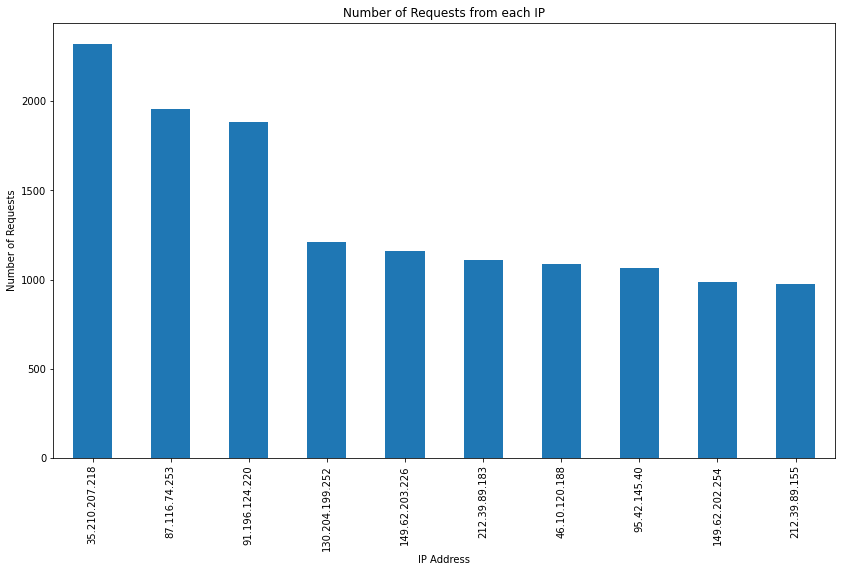

URL hits in descending order
/wp-admin/admin-ajax.php                                                                             1412
/wp-content/uploads/2021/05/HLGN-Logo.png                                                            1289
/?wc-ajax=get_refreshed_fragments                                                                    1193
/                                                                                                    1146
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                                     515
                                                                                                     ... 
/product/bengala-zulu-3-0-silver                                                                        1
/wp-cron.php?doing_wp_cron=1646144418.3816840648651123046875                                            1
/product/solaris-mars-glow-glazed/                                                                      1
/product/vyro-one

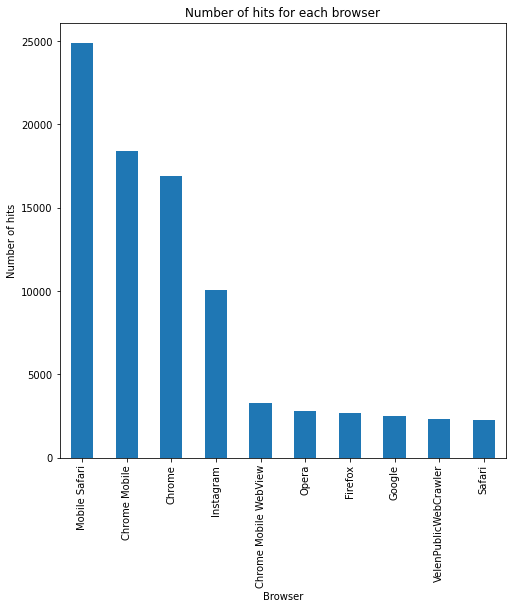

Number of http codes are: 93396


In [15]:
def on_submit_button_click():
    Automation(data)

def exit_window():
    window.destroy()

window = tkinter.Tk()
window.geometry("400x200")

# Label for "Automation"
label_automation = tkinter.Label(window, text="Automation")
label_automation.pack()

# Submit Button
button_submit = tkinter.Button(window, text="Submit", command=on_submit_button_click)
button_submit.config(width=20, height=2)
button_submit.pack()

# Exit Button
button_exit = tkinter.Button(window, text="Exit", command=exit_window)
button_exit.config(width=20, height=2)
button_exit.pack()

window.mainloop()